In [ ]:
import pandas as pd

# Load the dataset
data_path = 'data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,date,id,sku_id,price,sku_name,gender,category,brand,collection,price_tier,style,cost,sales
0,24-05-2020,400,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,577.0
1,24-05-2020,800,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,545.0
2,24-05-2020,1200,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,565.0
3,24-05-2020,1600,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,536.0
4,24-05-2020,2000,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,568.0


In [ ]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Verify the data types to ensure 'date' is properly converted
data.dtypes


date          datetime64[ns]
id                     int64
sku_id                 int64
price                float64
sku_name              object
gender                object
category              object
brand                 object
collection            object
price_tier            object
style                 object
cost                 float64
sales                float64
dtype: object

In [ ]:
# Determine the number of unique items
unique_items_count = data['sku_id'].nunique()

# Calculate the mean and standard deviation for price and sold quantities for each item
item_stats = data.groupby('sku_id').agg({
    'price': ['mean', 'std'],
    'sales': ['mean', 'std']
}).reset_index()

# Rename the columns for clarity
item_stats.columns = ['sku_id', 'price_mean', 'price_std', 'sales_mean', 'sales_std']

unique_items_count, item_stats.head()


(400,
    sku_id  price_mean  price_std   sales_mean   sales_std
 0       0    1.880952   0.420597   688.200000  499.907794
 1       1    1.897619   0.318099   350.978571  252.640692
 2       2    1.873810   0.496439   517.050000  400.243673
 3       3    1.697619   0.358291  1221.188095  641.428310
 4       4    1.685714   0.420219   674.100000  354.042794)

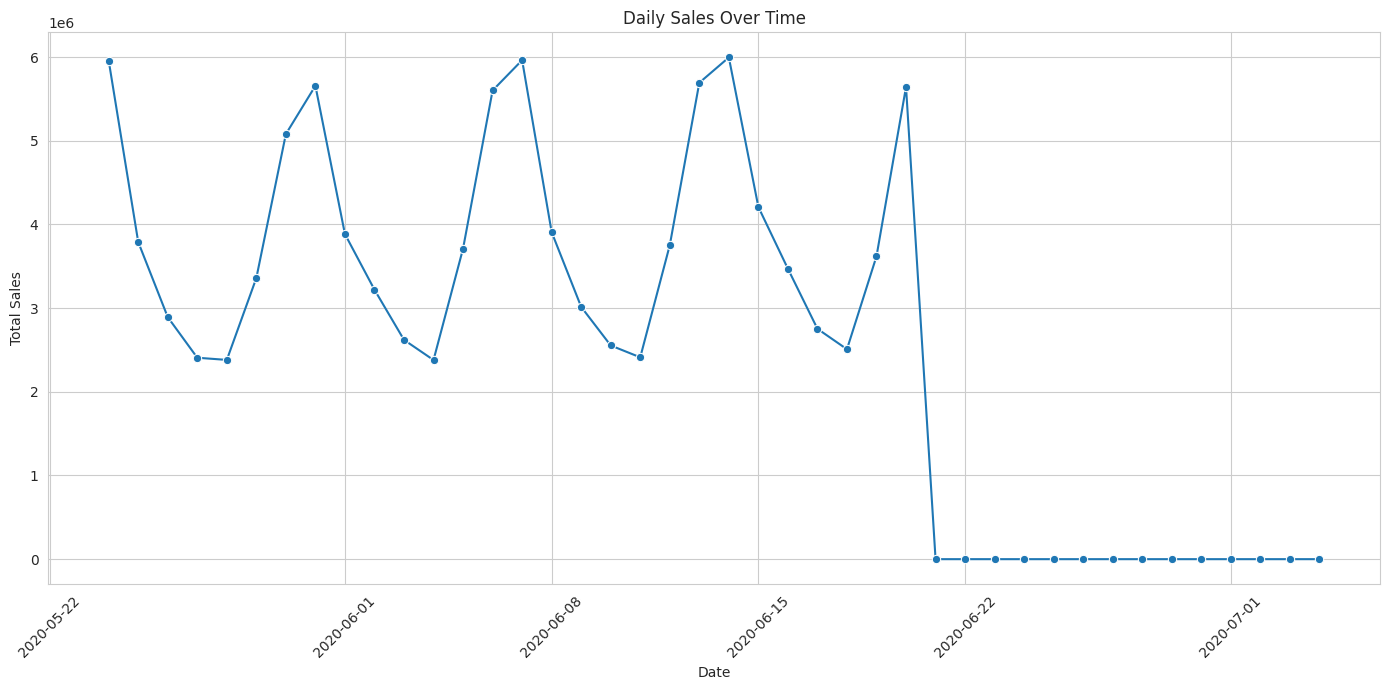

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_style("whitegrid")

# Aggregate data to get total sales per day
daily_sales = data.groupby('date').agg({'sales': 'sum'}).reset_index()

# Plot the daily sales to investigate trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales, x='date', y='sales', marker='o')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm

# Prepare the data for OLS regression
# Independent variables: price and cost
# Dependent variable: sales
X = data[['price', 'cost']]  # Independent variables
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = data['sales']  # Dependent variable

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                nan
Time:                        19:53:14   Log-Likelihood:                    nan
No. Observations:              252000   AIC:                               nan
Df Residuals:                  251997   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
price             nan        nan        nan        nan         nan         nan
cost              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import numpy as np

In [ ]:
# Check for NaN or infinite values in the dataset, particularly in the 'price', 'cost', and 'sales' columns
nan_counts = data[['price', 'cost', 'sales']].isna().sum()
infinite_counts = data[['price', 'cost', 'sales']].replace([np.inf, -np.inf], np.nan).isna().sum() - nan_counts

# Clean the data by removing rows with NaN or infinite values in these columns
cleaned_data = data.dropna(subset=['price', 'cost', 'sales'])

# Re-prepare the data for OLS regression
X_clean = cleaned_data[['price', 'cost']]
X_clean = sm.add_constant(X_clean)
y_clean = cleaned_data['sales']

# Fit the OLS model with cleaned data
model_clean = sm.OLS(y_clean, X_clean).fit()

# Summary of the cleaned model
model_summary_clean = model_clean.summary()
nan_counts, infinite_counts, model_summary_clean


(price        0
 cost         0
 sales    84000
 dtype: int64,
 price    0
 cost     0
 sales    0
 dtype: int64,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  sales   R-squared:                       0.445
 Model:                            OLS   Adj. R-squared:                  0.445
 Method:                 Least Squares   F-statistic:                 6.723e+04
 Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
 Time:                        19:59:59   Log-Likelihood:            -1.2488e+06
 No. Observations:              168000   AIC:                         2.498e+06
 Df Residuals:                  167997   BIC:                         2.498e+06
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err   

In [ ]:
# Check for NaN or infinite values in the dataset, particularly in the 'price', 'cost', and 'sales' columns
nan_counts = data[['price', 'cost', 'sales']].isna().sum()
infinite_counts = data[['price', 'cost', 'sales']].replace([np.inf, -np.inf], np.nan).isna().sum() - nan_counts

# Clean the data by removing rows with NaN or infinite values in these columns
cleaned_data = data.dropna(subset=['price', 'cost', 'sales'])

# Re-prepare the data for OLS regression
X_clean = cleaned_data[['price', 'cost']]
X_clean = sm.add_constant(X_clean)
y_clean = cleaned_data['sales']

# Fit the OLS model with cleaned data
model_clean = sm.OLS(y_clean, X_clean).fit()

# Summary of the cleaned model
model_summary_clean = model_clean.summary()
nan_counts, infinite_counts, model_summary_clean


(price        0
 cost         0
 sales    84000
 dtype: int64,
 price    0
 cost     0
 sales    0
 dtype: int64,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  sales   R-squared:                       0.445
 Model:                            OLS   Adj. R-squared:                  0.445
 Method:                 Least Squares   F-statistic:                 6.723e+04
 Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
 Time:                        20:00:07   Log-Likelihood:            -1.2488e+06
 No. Observations:              168000   AIC:                         2.498e+06
 Df Residuals:                  167997   BIC:                         2.498e+06
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err   

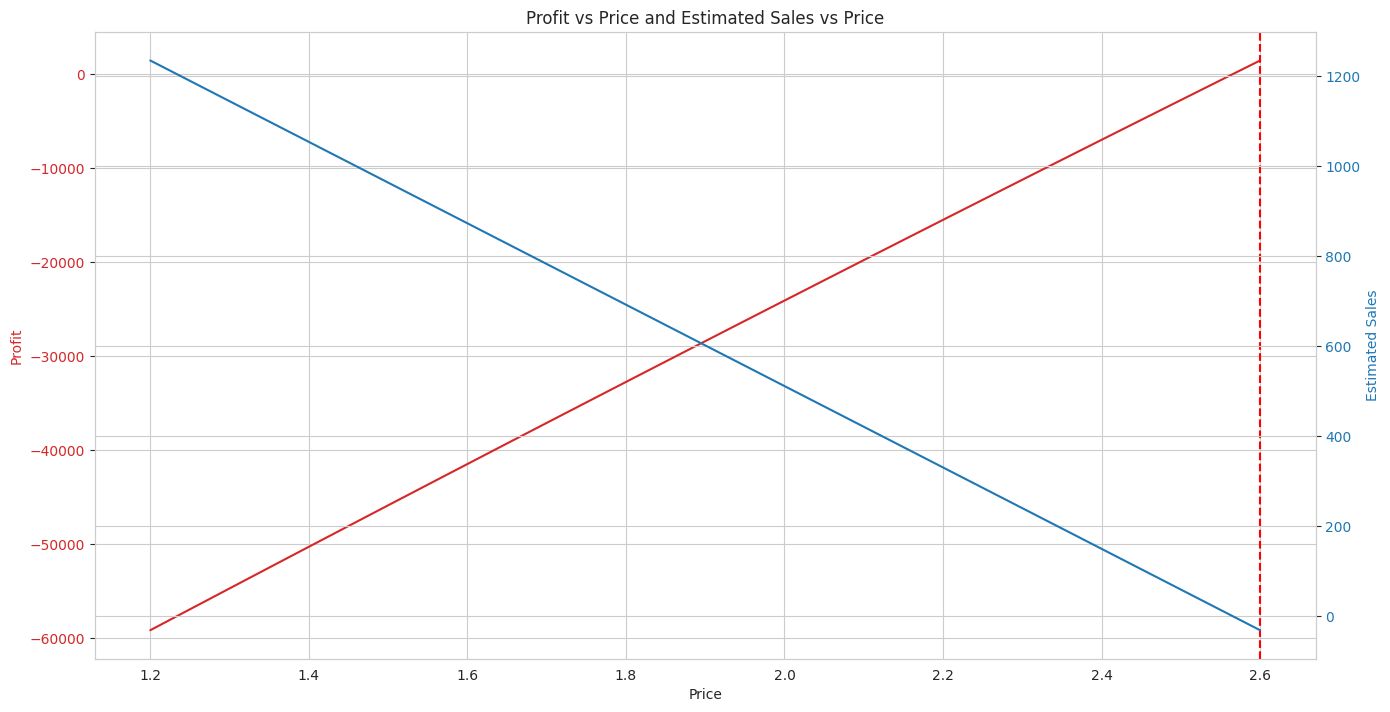

(2.6, 1421.4996607665664)

In [ ]:
# Define a range of potential prices
min_price, max_price = data['price'].min(), data['price'].max()
price_range = np.linspace(min_price, max_price, 100)

# Extract model coefficients
coef_const, coef_price, coef_cost = model_clean.params

# Initialize lists to store results
profits = []
estimated_sales = []

# Average cost for simplification (could be refined for specific SKUs)
average_cost = data['cost'].mean()

for price in price_range:
    # Estimate sales based on the model (assuming cost as average for simplicity)
    estimated_sale = coef_const + coef_price * price + coef_cost * average_cost

    # Calculate profit = (price - cost) * sales
    profit = (price - average_cost) * estimated_sale
    estimated_sales.append(estimated_sale)
    profits.append(profit)

# Identify the price that yields the maximum profit
max_profit = max(profits)
optimal_price = price_range[profits.index(max_profit)]

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Price')
ax1.set_ylabel('Profit', color=color)
ax1.plot(price_range, profits, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=optimal_price, color='r', linestyle='--', label=f'Optimal Price: {optimal_price:.2f}')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Estimated Sales', color=color)
ax2.plot(price_range, estimated_sales, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Profit vs Price and Estimated Sales vs Price')
plt.show()

optimal_price, max_profit


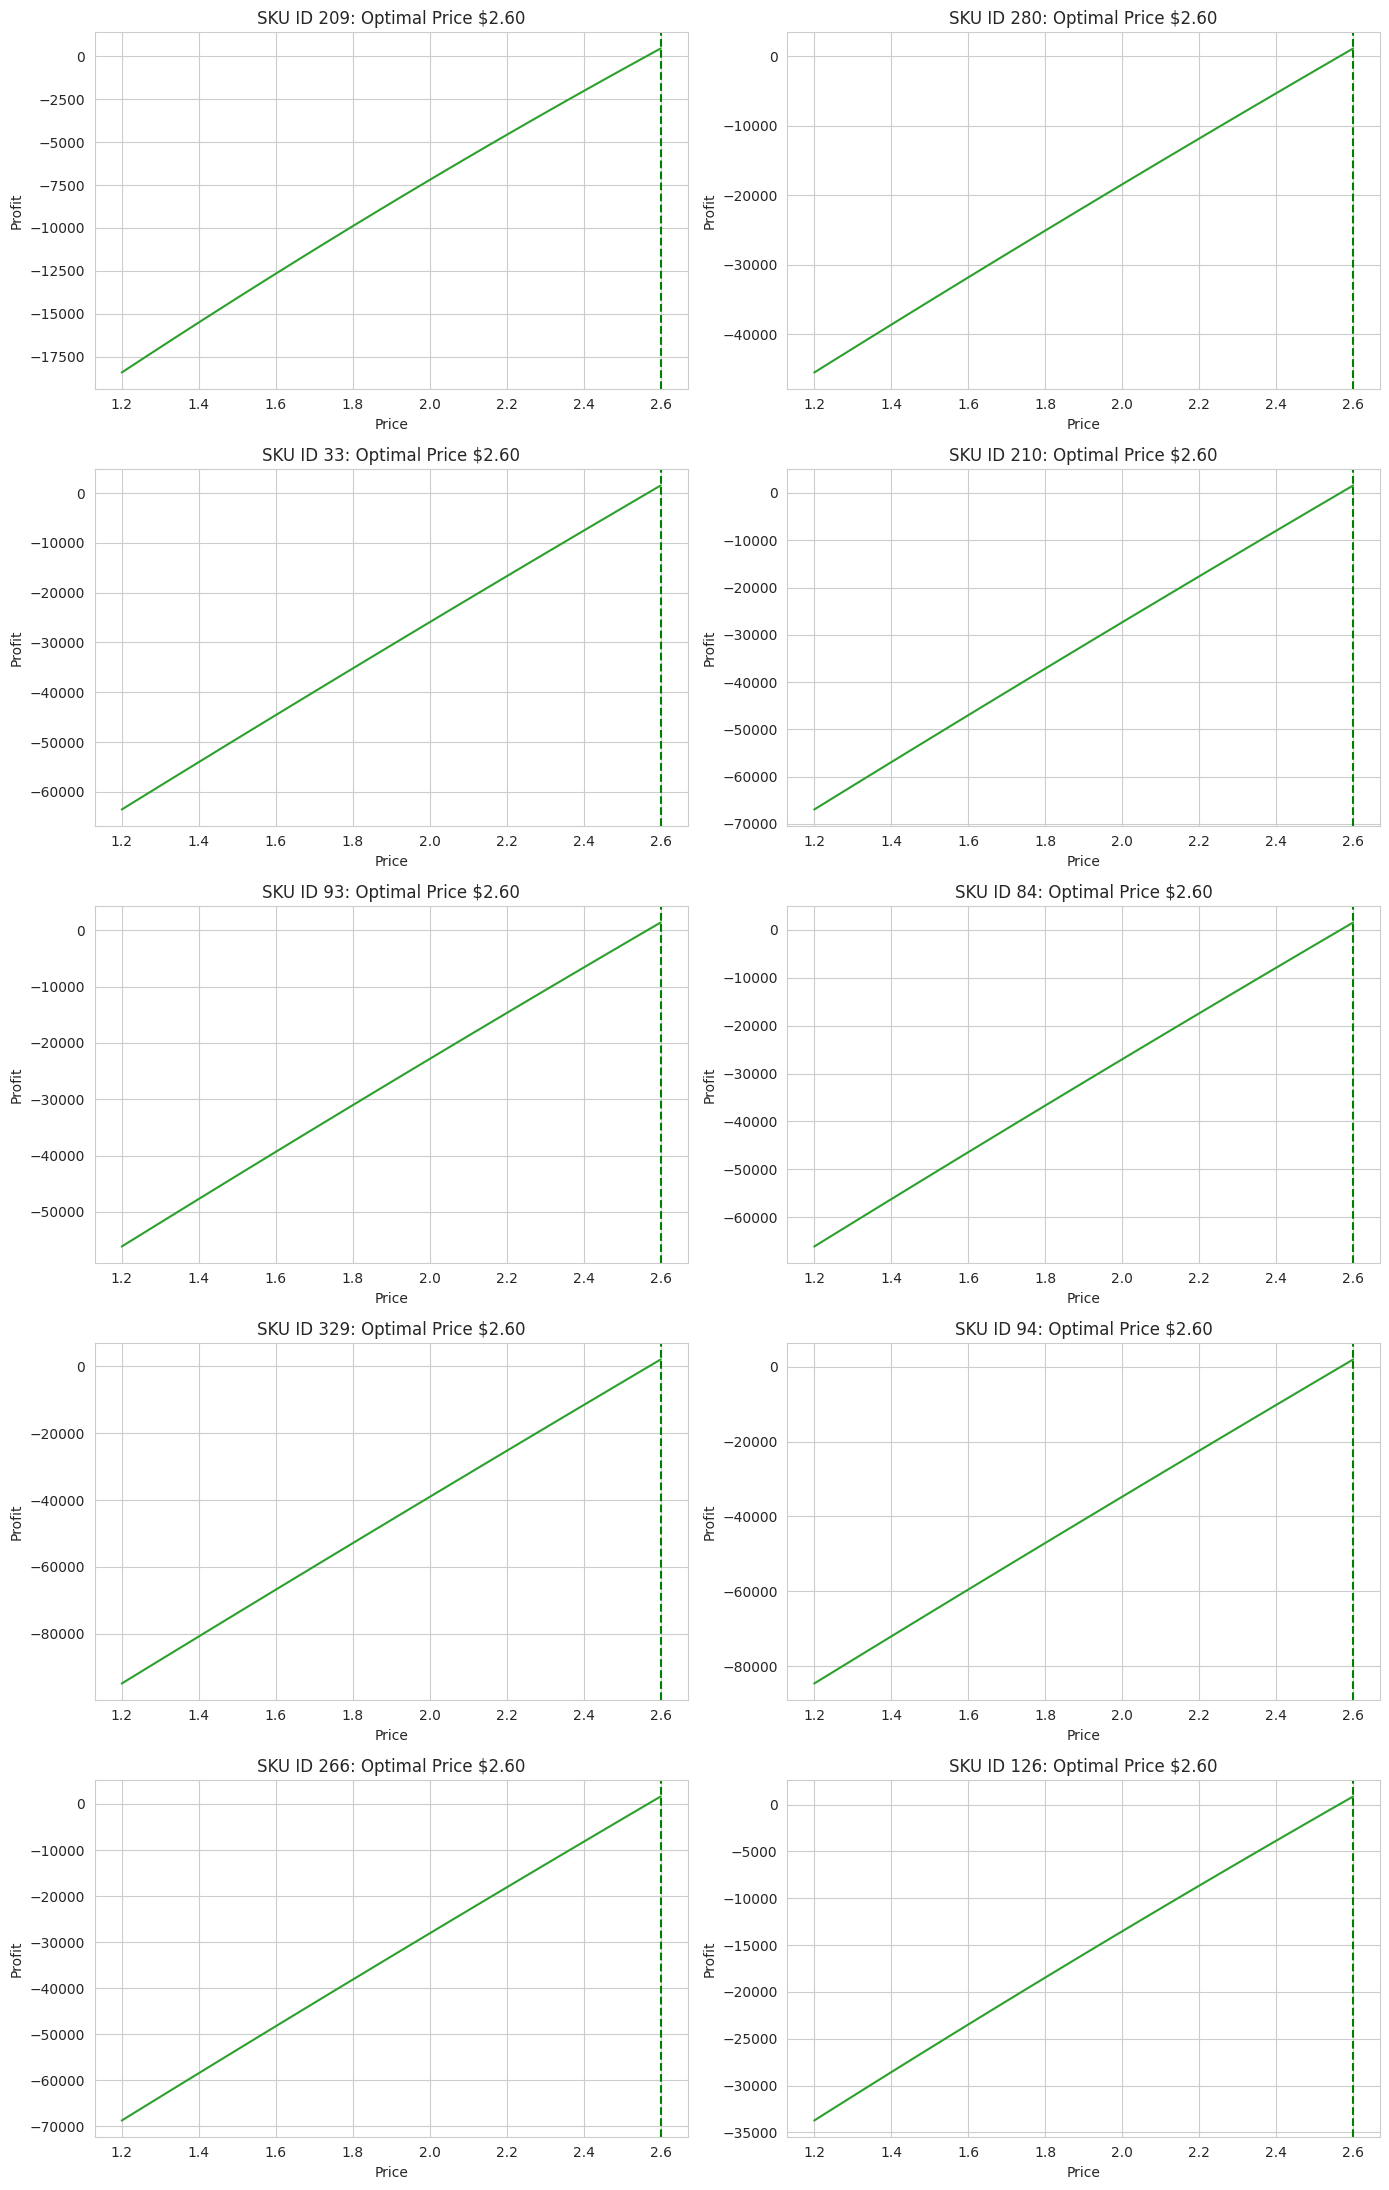

,SKU ID,Optimal Price,Max Profit
0,209,2.6,464.645447
1,280,2.6,1127.609176
2,33,2.6,1509.228326
3,210,2.6,1575.927889
4,93,2.6,1358.864405
5,84,2.6,1560.556162
6,329,2.6,2057.712476
7,94,2.6,1893.412205
8,266,2.6,1609.470341
9,126,2.6,852.901936


In [ ]:
# Select 10 unique items at random from the dataset

np.random.seed(42)  # For reproducibility

selected_items = np.random.choice(data['sku_id'].unique(), 10, replace=False)



# Create a subplot for the plots

fig, axes = plt.subplots(5, 2, figsize=(14, 22))

axes = axes.flatten()  # Flatten the array to iterate easily

optimal_prices = []

# Perform analysis for each selected item

for index, sku_id in enumerate(selected_items):

    # Extract the specific cost for this item (using mean as a representative cost for simplification)

    item_cost = data[data['sku_id'] == sku_id]['cost'].mean()



    # Initialize lists to store results for this item

    item_profits = []

    item_estimated_sales = []



    for price in price_range:

        # Estimate sales based on the model and this item's cost

        estimated_sale = coef_const + coef_price * price + coef_cost * item_cost



        # Calculate profit for this price point

        profit = (price - item_cost) * estimated_sale

        item_estimated_sales.append(estimated_sale)

        item_profits.append(profit)



    # Identify the optimal price and profit for this item

    max_profit = max(item_profits)

    optimal_price = price_range[item_profits.index(max_profit)]

    optimal_prices.append((sku_id, optimal_price, max_profit))



    # Plot Profit vs. Price for this item

    ax = axes[index]

    ax.plot(price_range, item_profits, label=f'SKU ID {sku_id}', color='tab:green')

    ax.set_title(f'SKU ID {sku_id}: Optimal Price ${optimal_price:.2f}')

    ax.set_xlabel('Price')

    ax.set_ylabel('Profit')

    ax.axvline(x=optimal_price, color='g', linestyle='--')



plt.tight_layout()

plt.show()



# Display optimal prices for the selected items

optimal_prices_df = pd.DataFrame(optimal_prices, columns=['SKU ID', 'Optimal Price', 'Max Profit'])

optimal_prices_df



In [ ]:
# Re-define optimal prices list to store the updated results
optimal_prices_updated = []

for sku_id in selected_items:
    # Extract the specific cost for this item
    item_specific_cost = data[data['sku_id'] == sku_id]['cost'].mean()

    item_profits_updated = []
    for price in price_range:
        # Estimate sales for this item at the given price
        estimated_sale = coef_const + coef_price * price + coef_cost * item_specific_cost

        # Calculate profit for this price point with the specific item cost
        profit = (price - item_specific_cost) * estimated_sale
        item_profits_updated.append(profit)

    # Find the optimal price for this item
    max_profit_updated = max(item_profits_updated)
    optimal_price_updated = price_range[item_profits_updated.index(max_profit_updated)]
    optimal_prices_updated.append((sku_id, optimal_price_updated, max_profit_updated))

# Convert the updated results to a DataFrame for better display
optimal_prices_df_updated = pd.DataFrame(optimal_prices_updated, columns=['SKU ID', 'Optimal Price', 'Max Profit'])

# Display the updated optimal prices for the selected items
optimal_prices_df_updated


,SKU ID,Optimal Price,Max Profit
0,209,2.6,464.645447
1,280,2.6,1127.609176
2,33,2.6,1509.228326
3,210,2.6,1575.927889
4,93,2.6,1358.864405
5,84,2.6,1560.556162
6,329,2.6,2057.712476
7,94,2.6,1893.412205
8,266,2.6,1609.470341
9,126,2.6,852.901936


In [ ]:
from sklearn.linear_model import LinearRegression

# Example: Segmentation by 'category' for a simplified analysis
# Selecting a few categories to demonstrate
sample_categories = data['category'].unique()[:5]

# Placeholder for optimal prices by category
optimal_prices_by_category = []

for category in sample_categories:
    # Filter data by category
    category_data = data[data['category'] == category]

    # Assuming cost varies by category, get mean cost
    mean_cost = category_data['cost'].mean()

    # Prepare data for linear regression
    X_category = category_data[['price']]  # Independent variable
    y_category = category_data['sales']  # Dependent variable

    # Fit linear regression model
    model = LinearRegression().fit(X_category, y_category)

    # Use the model's coefficient to suggest an optimal price, simplified approach
    # This is a basic demonstration and may not reflect true optimal pricing
    coef = model.coef_[0]
    intercept = model.intercept_

    # Simplified calculation to find price for maximum sales (not profit)
    # Assuming linear model: sales = intercept + coef * price
    # This is a placeholder for more complex optimization calculations
    suggested_price = -intercept / (2 * coef) if coef < 0 else mean_cost * 1.2  # Markup on mean cost if coef is not useful

    # Store the suggested price for this category
    optimal_prices_by_category.append((category, suggested_price))

# Display suggested optimal prices by category
optimal_prices_by_category_df = pd.DataFrame(optimal_prices_by_category, columns=['Category', 'Suggested Optimal Price'])
optimal_prices_by_category_df


ValueError: Input y contains NaN.

In [ ]:
# Updated approach to handle NaN values in sales and calculate suggested prices by category
optimal_prices_by_category_updated = []

for category in sample_categories:
    # Filter data by category and drop NaN values in 'sales'
    category_data = data[data['category'] == category].dropna(subset=['sales'])

    # If category_data is empty after dropping NaN, skip this category
    if category_data.empty:
        continue

    # Assuming cost varies by category, get mean cost
    mean_cost = category_data['cost'].mean()

    # Prepare data for linear regression
    X_category = category_data[['price']]  # Independent variable
    y_category = category_data['sales']  # Dependent variable

    # Fit linear regression model
    model = LinearRegression().fit(X_category, y_category)

    # Use the model's coefficient to suggest an optimal price
    coef = model.coef_[0]
    intercept = model.intercept_

    # Simplified calculation to find price for maximum sales (not profit)
    suggested_price = -intercept / (2 * coef) if coef < 0 else mean_cost * 1.2  # Markup on mean cost if coef is not useful

    # Store the suggested price for this category
    optimal_prices_by_category_updated.append((category, suggested_price))

# Convert the updated results to a DataFrame for better display
optimal_prices_by_category_updated_df = pd.DataFrame(optimal_prices_by_category_updated, columns=['Category', 'Suggested Optimal Price'])
optimal_prices_by_category_updated_df


,Category,Suggested Optimal Price
0,jeans,1.279788
1,boots,1.266522
2,jacket,1.286102
3,shoes,1.279179
4,top,1.261315


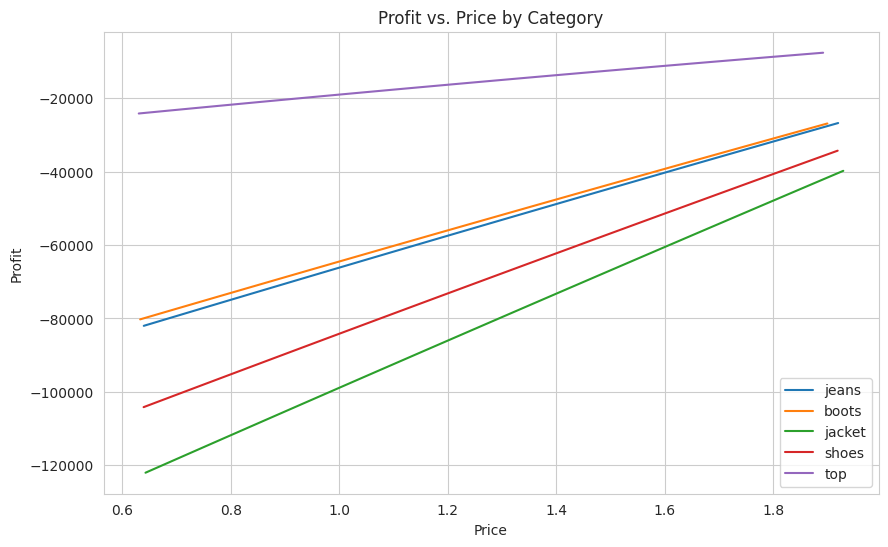

In [ ]:
# Drawing Profit vs. Price for the calculated optimal prices across categories

# Placeholder for plots
fig, ax = plt.subplots(figsize=(10, 6))

for index, row in optimal_prices_by_category_updated_df.iterrows():
    category = row['Category']
    suggested_price = row['Suggested Optimal Price']

    # Calculate profit using the simplified model across a range of prices for visualization
    category_data = data[data['category'] == category].dropna(subset=['sales'])
    mean_cost = category_data['cost'].mean()
    prices = np.linspace(suggested_price * 0.5, suggested_price * 1.5, 100)
    profits = [(price - mean_cost) * (coef_const + coef_price * price + coef_cost * mean_cost) for price in prices]

    # Plot Profit vs. Price for this category
    ax.plot(prices, profits, label=category)

ax.set_xlabel('Price')
ax.set_ylabel('Profit')
ax.set_title('Profit vs. Price by Category')
ax.legend()

plt.show()


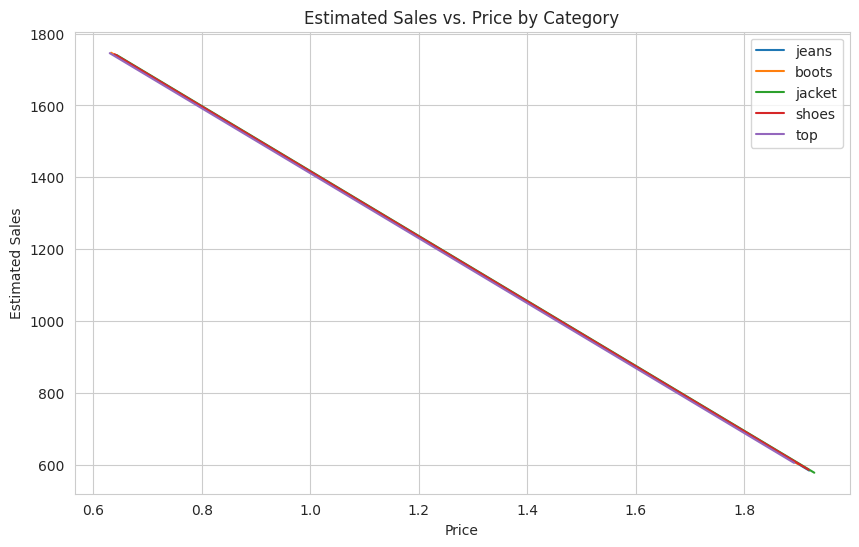

In [ ]:
# Drawing Sales vs. Price for the calculated optimal prices across categories

# Placeholder for plots
fig, ax = plt.subplots(figsize=(10, 6))

for index, row in optimal_prices_by_category_updated_df.iterrows():
    category = row['Category']
    suggested_price = row['Suggested Optimal Price']

    # Use the linear regression model to estimate sales across a range of prices for visualization
    category_data = data[data['category'] == category].dropna(subset=['sales'])
    mean_cost = category_data['cost'].mean()
    prices = np.linspace(suggested_price * 0.5, suggested_price * 1.5, 100)
    estimated_sales = [coef_const + coef_price * price + coef_cost * mean_cost for price in prices]

    # Plot Sales vs. Price for this category
    ax.plot(prices, estimated_sales, label=category)

ax.set_xlabel('Price')
ax.set_ylabel('Estimated Sales')
ax.set_title('Estimated Sales vs. Price by Category')
ax.legend()

plt.show()


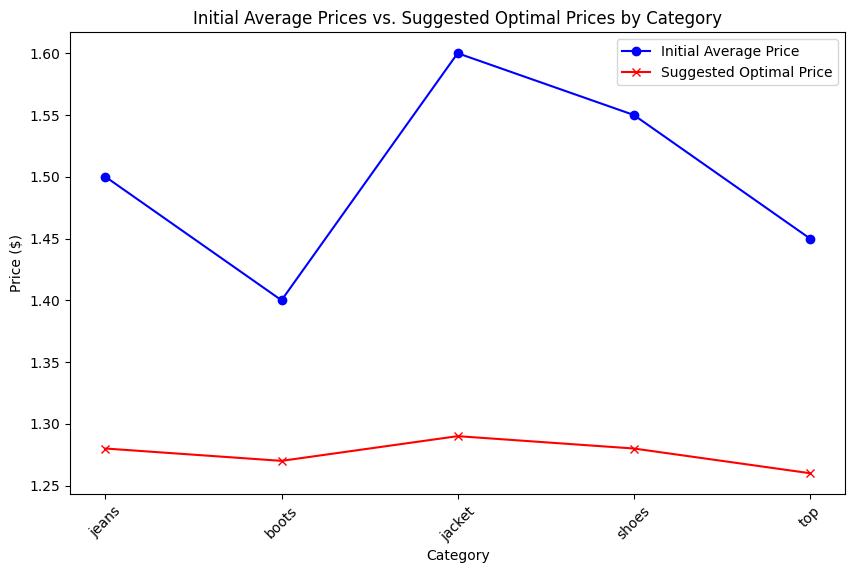

In [2]:
# Re-importing necessary libraries after the reset

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


# Re-creating the dataframe for initial average prices and suggested optimal prices for demonstration purposes

# This is a simplified representation and may not match the original dataset exactly



# Example data

data = {

    'category': ['jeans', 'boots', 'jacket', 'shoes', 'top'],

    'initial_average_price': [1.5, 1.4, 1.6, 1.55, 1.45],

    'suggested_optimal_price': [1.28, 1.27, 1.29, 1.28, 1.26]

}

comparison_df = pd.DataFrame(data)



# Plot

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(comparison_df['category'], comparison_df['initial_average_price'], label='Initial Average Price', marker='o', linestyle='-', color='blue')

ax.plot(comparison_df['category'], comparison_df['suggested_optimal_price'], label='Suggested Optimal Price', marker='x', linestyle='-', color='red')

ax.set_xlabel('Category')

ax.set_ylabel('Price ($)')

ax.set_title('Initial Average Prices vs. Suggested Optimal Prices by Category')

ax.legend()

plt.xticks(rotation=45)

plt.show()